<a href="https://colab.research.google.com/github/Ashishkumarpanda/Richter-s-Predictor-Modeling-Earthquake-Damage/blob/main/Richter's_Predictor_Modelling_Earthquake_Damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Liabraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, f1_score

# Loading The Data

In [ ]:
train_val = pd.read_csv("train_values.csv")
train_label= pd.read_csv("train_labels.csv")
test_val = pd.read_csv("test_values.csv")
train_val.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_label = pd.read_csv("train_labels.csv")
train_label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
train_val.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [ ]:
train_val.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
columns = list(train_val.columns)

In [ ]:
for i in columns:
  lst = np.unique(train_val[i])
  print("number of unique values in"+" "+str(i)+" "+"is =" ,len(lst))

number of unique values in building_id is = 260601
number of unique values in geo_level_1_id is = 31
number of unique values in geo_level_2_id is = 1414
number of unique values in geo_level_3_id is = 11595
number of unique values in count_floors_pre_eq is = 9
number of unique values in age is = 42
number of unique values in area_percentage is = 84
number of unique values in height_percentage is = 27
number of unique values in land_surface_condition is = 3
number of unique values in foundation_type is = 5
number of unique values in roof_type is = 3
number of unique values in ground_floor_type is = 5
number of unique values in other_floor_type is = 4
number of unique values in position is = 4
number of unique values in plan_configuration is = 10
number of unique values in has_superstructure_adobe_mud is = 2
number of unique values in has_superstructure_mud_mortar_stone is = 2
number of unique values in has_superstructure_stone_flag is = 2
number of unique values in has_superstructure_cem

In [ ]:
alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
numerical_column = []
categorical_column = []
for i in columns:
  if (train_val[i][0] in alphabets):
    categorical_column.append(i)
  else:
    numerical_column.append(i)
print(categorical_column,"\n" "number of categorical columns are =",len(categorical_column))
print(numerical_column,"\n" "number of numerical columns are =",len(numerical_column))

['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'] 
number of categorical columns are = 8
['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_go

# Handeling categorical columns

In [ ]:
categorical_column

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [ ]:
le = LabelEncoder()
for i in categorical_column:
  train_val[i]=le.fit_transform(train_val[i])

In [ ]:
train_val.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


#Plotting pairplot and merging the data

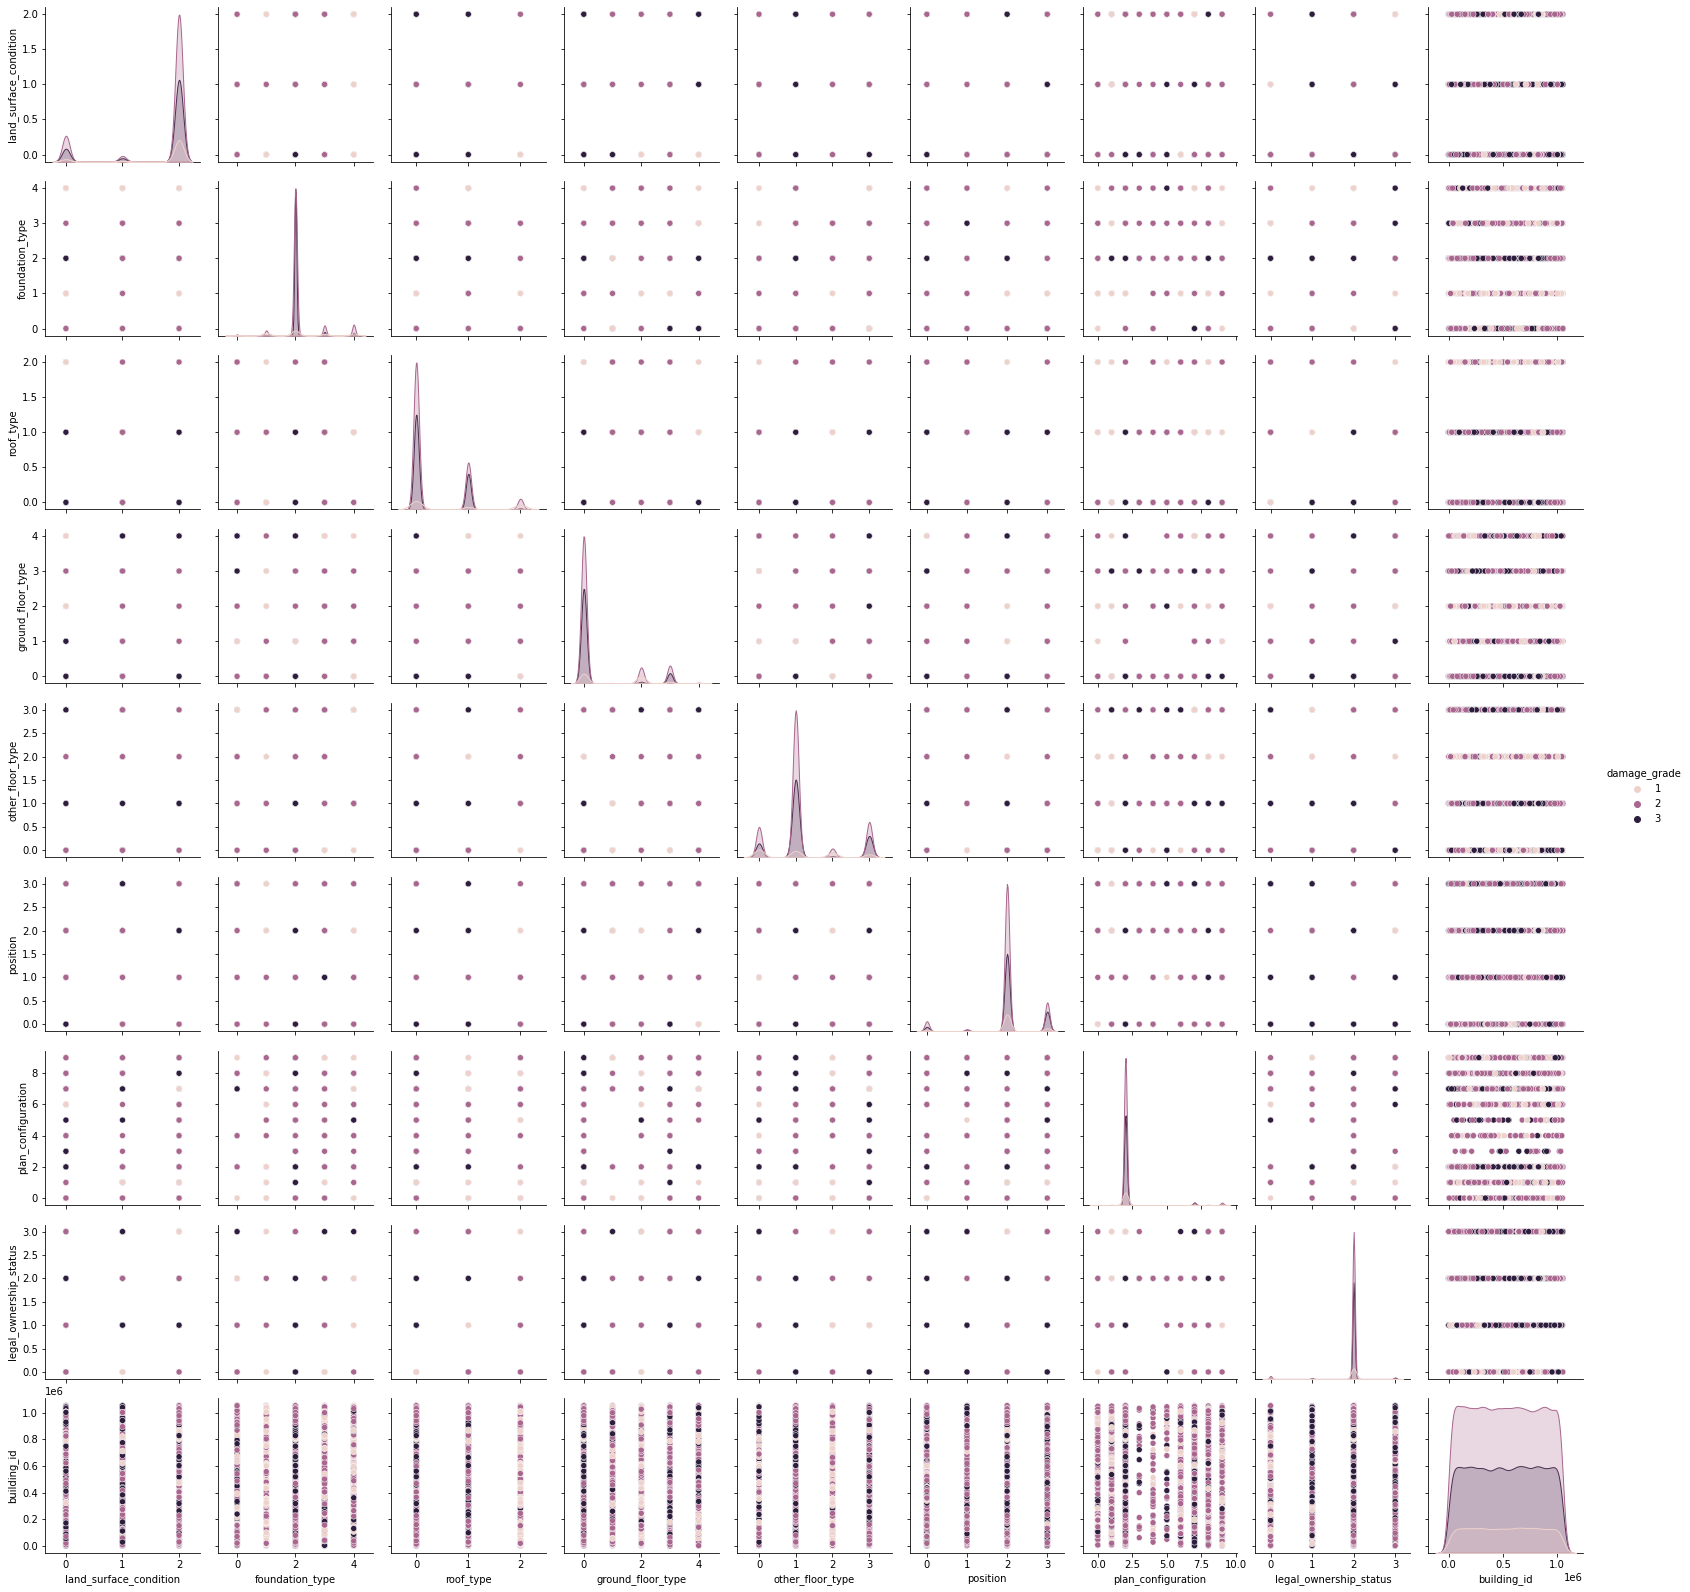

In [ ]:
sns.pairplot(train_val[categorical_column].join(train_label), 
             hue='damage_grade')

In [ ]:
train_val.head()
print(train_val.shape)

(260601, 39)


In [ ]:
damage_grade = ([train_label['damage_grade']])

In [ ]:
for i in categorical_column:                             
  test_val[i]=le.fit_transform(test_val[i])

In [ ]:
print(train_label.shape)
print(train_val.shape)

(260601, 2)
(260601, 39)


In [ ]:
df_final = pd.merge(train_val, train_label, how = 'inner')
df_final.drop(columns='building_id',axis=1,inplace=True)
print(df_final.shape)

(260601, 39)


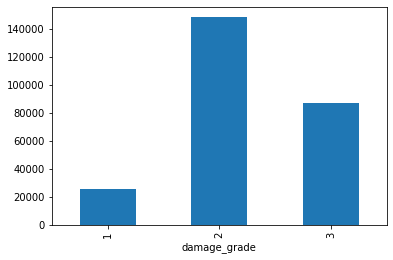

In [ ]:
import matplotlib.pyplot as plt
df_final.groupby('damage_grade')['damage_grade'].count().plot.bar()

#XGBoost feature selection
We also tried using extratree classifier for finding important features, but found XGboost's more suitable for our approach.

In [ ]:
x_new = df_final.drop(columns=['damage_grade',
                               'has_secondary_use_hotel', 'has_secondary_use_other',
                               'has_secondary_use_rental', 'has_secondary_use_agriculture',
                               'legal_ownership_status', 'has_superstructure_other',
                               'has_superstructure_rc_non_engineered'],axis=1) #,'geo_level_2_id','geo_level_3_id', 'land_surface_condition','has_superstructure_rc_engineered','has_secondary_use'
y_new = df_final['damage_grade'] 
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.25, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
model = XGBClassifier()
model.fit(x_train_new, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x_test_new)
metrics.f1_score(y_pred, y_test_new, average = 'micro')

0.6751392917990514

Based on the feature important plot, we removed 7 features having the least F score

[0.06144939 0.00959936 0.00394088 0.01963177 0.06708691 0.0101065
 0.0081627  0.00746409 0.06579122 0.09042757 0.01991135 0.01272471
 0.00796739 0.01146636 0.10602295 0.25785452 0.02699126 0.00948801
 0.03574352 0.10090212 0.02795419 0.00598983 0.0131395  0.00913981
 0.01104405 0.         0.         0.         0.         0.
 0.        ]


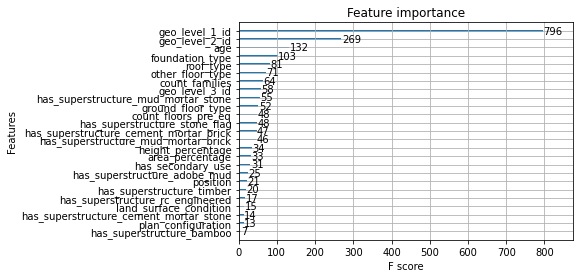

In [ ]:
print(model.feature_importances_)
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

#LGBM

We tried with multiple classifiers and gradient boosting methods including CatBoost and XGBoost, but found LGBM giving use the most accuracy.

In [ ]:
x_new = df_final.drop(columns=['damage_grade',
                               'has_secondary_use_hotel', 'has_secondary_use_other',
                               'has_secondary_use_rental', 'has_secondary_use_agriculture',
                               'legal_ownership_status', 'has_superstructure_other',
                               'has_superstructure_rc_non_engineered'],axis=1) 
y_new = df_final['damage_grade'] 
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.25, random_state=42)

In [ ]:
cat_data = [ 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration']
y_train_ = y_train_new.map({1:0,2:1,3:2})

lgb_test = lgb.Dataset(x_test_new, y_test_new, reference = d_train)

In [ ]:
d_train = lgb.Dataset(x_train_new, label = y_train_, categorical_feature = cat_data)
d_test = lgb.Dataset(x_test_new, y_test_new)
evals_result = {}
params={}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['max_depth'] = -1 
params['num_class'] = 3 
params['num_leaves'] = 20 #20
params['is_unbalanced'] = True
params['feature_fraction'] = 0.4
params['bagging_fraction'] = 0.9
params['lambda_l2'] = 0.2

In [ ]:
clf1 = lgb.train(params, d_train, num_boost_round = 20000, 
                 valid_sets = [d_train], evals_result = evals_result,
                 verbose_eval = 1000)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[1000]	training's multi_logloss: 0.601804
[2000]	training's multi_logloss: 0.566701
[3000]	training's multi_logloss: 0.541843
[4000]	training's multi_logloss: 0.522555
[5000]	training's multi_logloss: 0.50622
[6000]	training's multi_logloss: 0.491476
[7000]	training's multi_logloss: 0.478816
[8000]	training's multi_logloss: 0.467162
[9000]	training's multi_logloss: 0.456663
[10000]	training's multi_logloss: 0.446694
[11000]	training's multi_logloss: 0.436965
[12000]	training's multi_logloss: 0.428146
[13000]	training's multi_logloss: 0.419747
[14000]	training's multi_logloss: 0.412147
[15000]	training's multi_logloss: 0.404915
[16000]	training's multi_logloss: 0.397896
[17000]	training's multi_logloss: 0.391396
[18000]	training's multi_logloss: 0.385205
[19000]	training's multi_logloss: 0.379044
[20000]	training's multi_logloss: 0.37318


In [ ]:
y_pred = clf1.predict(x_test_new)
y_pred_1 = [np.argmax(line) for line in y_pred]
y_test_ = y_test_new.map({1:0,2:1,3:2})

In [ ]:
metrics.f1_score(y_test_, y_pred_1, average = 'micro')

0.7431351782781539

In [ ]:
evals_result

{'training': defaultdict(list,
             {'multi_logloss': [0.8974381114479748,
               0.8896048233632567,
               0.8789887750668278,
               0.8711323869254961,
               0.8618205762038175,
               0.8543797929298342,
               0.8490761832670913,
               0.8423863336930778,
               0.8385873004987002,
               0.8321246299852023,
               0.8287370114767233,
               0.8210820097692599,
               0.815475193787748,
               0.8109665472807265,
               0.8051880008750713,
               0.8029537915977913,
               0.7986160843858592,
               0.7942697801606332,
               0.7904712580353608,
               0.788197910907198,
               0.7863336714587541,
               0.7829407421865575,
               0.7796082527592969,
               0.7748444148332936,
               0.771732442206824,
               0.7698258828857348,
               0.7676525237365917,
          

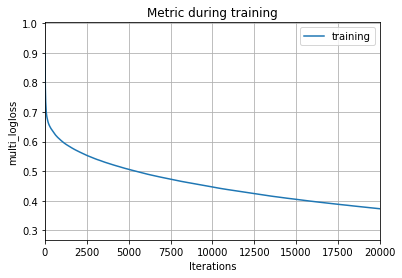

In [ ]:
lgb.plot_metric(evals_result)

Thus, by parameter tuning and feature selection alone, without any major feature engineering or data preprocessing, we were able to achieve a F1 Score of 0.7431, with the highest being 0.7558 in the competition.

#Creating the submission file

In [ ]:
x_sub = test_val.drop(columns=['building_id', 'building_id',
                               'has_secondary_use_hotel', 'has_secondary_use_other',
                               'has_secondary_use_rental', 'has_secondary_use_agriculture',
                               'legal_ownership_status', 'has_superstructure_other',
                               'has_superstructure_rc_non_engineered'] ,axis=1)

In [ ]:
x_sub.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_engineered,count_families,has_secondary_use,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,damage_grade
0,17,596,11307,3,20,7,6,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
1,6,141,11987,2,25,13,5,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,22,19,10044,2,5,4,5,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,26,39,633,1,0,19,3,2,2,2,2,0,3,2,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0
4,17,289,7970,3,15,8,7,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2


In [ ]:
y_sub = clf1.predict(x_sub)
y_pred_sub = [np.argmax(line) for line in y_sub]
test_val['damage_grade'] = y_pred_sub
submission_df = test_val[['building_id', 'damage_grade']]
submission_df = submission_df.replace({0:1,1:2,2:3})
submission_df.to_csv('/content/submission_74_31.csv', index = False)